<a href="https://colab.research.google.com/github/toshineb/Meta-Analysis/blob/main/Mortality_Rate_meta_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.meta_analysis import combine_effects

# Input mortality data
data = {
    "Author": [
        "Shaukat Ali et al", "Noorani MA et al", "Khan MD et al", "Atamanalp S.S et al",
        "Kouame J et al", "Osifo OD et al", "Gul S et al", "Mishra M et al", "Amit K et al",
        "Nsar AR et al", "Arshad M", "Ugochuckwu AiI et all", "Farooq et al", "Ashrad MM et al",
        "Mittal S et al", "Shah M et al", "Ullah R et al", "Shah UA et al", "Cheema et al",
        "Waqar T el al", "Beniwal US et al", "Kapoor SC et al", "Rathod SK et al", "Thakre S et al",
        "Asif M et al", "Agrawal P et al"
    ],
    "N_Primary": [
        20, 57, 40, 41, 31, 2, 52, 41, 42, 30, 35, 52, 23, 40, 30, 32, 51, 200, 50, 25, 113, 25, 19, 24, 40, 25
    ],
    "N_Ileostomy": [
        30, 3, 40, 32, 33, 2, 21, 19, 58, 30, 35, 7, 23, 54, 30, 32, 52, 200, 50, 25, 70, 25, 7, 26, 40, 22
    ],
    "Mort_Primary": [
        5, 1, 3, 2, 8, 2, 3, 3, 8, 0, 2, 6, 2, 5, 0, 5, 1, 22, 3, 3, 8, 0, 2, 2, 0, 3
    ],
    "Mort_Ileostomy": [
        3, 0, 8, 7, 14, 0, 4, 3, 4, 3, 5, 2, 1, 1, 0, 3, 2, 34, 8, 2, 9, 0, 3, 3, 0, 4
    ]
}

df = pd.DataFrame(data)



In [ ]:
df.head(26)

,Author,N_Primary,N_Ileostomy,Mort_Primary,Mort_Ileostomy,Risk_Primary,Risk_Ileostomy,Risk_Diff,Var_Diff
0,Shaukat Ali et al,20,30,5,3,0.250000,0.100000,-0.150000,0.012375
1,Noorani MA et al,57,3,1,0,0.017544,0.000000,-0.017544,0.000302
2,Khan MD et al,40,40,3,8,0.075000,0.200000,0.125000,0.005734
3,Atamanalp S.S et al,41,32,2,7,0.048780,0.218750,0.169970,0.006472
4,Kouame J et al,31,33,8,14,0.258065,0.424242,0.166178,0.013578
6,Gul S et al,52,21,3,4,0.057692,0.190476,0.132784,0.008388
7,Mishra M et al,41,19,3,3,0.073171,0.157895,0.084724,0.008652
8,Amit K et al,42,58,8,4,0.190476,0.068966,-0.121511,0.004778
9,Nsar AR et al,30,30,0,3,0.000000,0.100000,0.100000,0.003000
10,Arshad M,35,35,2,5,0.057143,0.142857,0.085714,0.005038


In [ ]:
# Convert raw counts into risk difference and variance for each study
df["Risk_Primary"] = df["Mort_Primary"] / df["N_Primary"]
df["Risk_Ileostomy"] = df["Mort_Ileostomy"] / df["N_Ileostomy"]
df["Risk_Diff"] = df["Risk_Ileostomy"] - df["Risk_Primary"]
df["Var_Diff"] = (df["Risk_Primary"] * (1 - df["Risk_Primary"]) / df["N_Primary"]) + \
                 (df["Risk_Ileostomy"] * (1 - df["Risk_Ileostomy"]) / df["N_Ileostomy"])

# Drop studies with zero variance (to avoid infinite weight)
df = df[df["Var_Diff"] > 0]

# Meta-analysis: DerSimonian-Laird random effects model
pooled = combine_effects(df["Risk_Diff"].values, df["Var_Diff"].values, method_re="dl")

pooled_rd = pooled.mean_effect_re
pooled_se = pooled.sd_eff_w_re
ci_low = pooled_rd - 1.96 * pooled_se
ci_high = pooled_rd + 1.96 * pooled_se



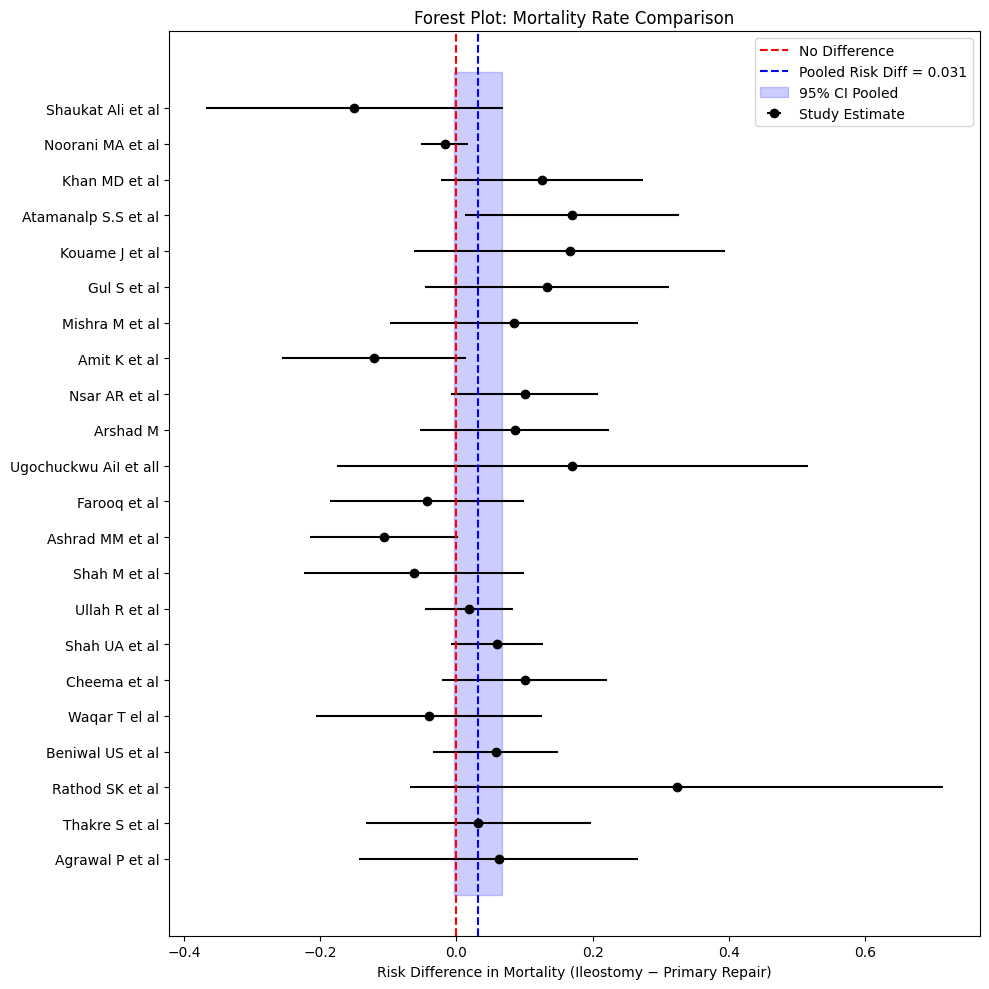

In [ ]:
# Forest plot
fig, ax = plt.subplots(figsize=(10, 10))
y_pos = np.arange(len(df))
study_ci_low = df["Risk_Diff"] - 1.96 * np.sqrt(df["Var_Diff"])
study_ci_high = df["Risk_Diff"] + 1.96 * np.sqrt(df["Var_Diff"])

ax.errorbar(df["Risk_Diff"], y_pos, xerr=1.96 * np.sqrt(df["Var_Diff"]),
            fmt='o', color='black', label='Study Estimate')
ax.axvline(0, color='red', linestyle='--', label='No Difference')
ax.axvline(pooled_rd, color='blue', linestyle='--', label=f'Pooled Risk Diff = {pooled_rd:.3f}')
ax.fill_betweenx([-1, len(df)], ci_low, ci_high, color='blue', alpha=0.2, label='95% CI Pooled')

ax.set_yticks(y_pos)
ax.set_yticklabels(df["Author"])
ax.invert_yaxis()
ax.set_xlabel("Risk Difference in Mortality (Ileostomy − Primary Repair)")
ax.set_title("Forest Plot: Mortality Rate Comparison")
ax.legend()

plt.tight_layout()
plt.show()
